# IPL Analytics

`Date`: '2023-04-06'

`Author`: Pinaki Ranjan Brahma

`Objective`: To find top players based on recent form to be used for fantasy leagues

# Steps

Data Read

In [1]:
path_dir = "data/"

path_bat = path_dir + 'Batting Stats/'
path_ball = path_dir + 'Bowling Stats/'

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:
# get all csv files from dir
l_bat = os.listdir(path_bat)
l_bat

l_ball = os.listdir(path_ball)
l_ball

['BATTING STATS - IPL_2016.csv',
 'BATTING STATS - IPL_2017.csv',
 'BATTING STATS - IPL_2022.csv',
 'BATTING STATS - IPL_2020.csv',
 'BATTING STATS - IPL_2021.csv',
 'BATTING STATS - IPL_2019.csv',
 'BATTING STATS - IPL_2018.csv']

['BOWLING STATS - IPL_2022.csv',
 'BOWLING STATS - IPL_2020.csv',
 'BOWLING STATS - IPL_2021.csv',
 'BOWLING STATS - IPL_2019.csv',
 'BOWLING STATS - IPL_2018.csv',
 'BOWLING STATS - IPL_2016.csv',
 'BOWLING STATS - IPL_2017.csv']

In [7]:
def get_year_from_file(txt):
    step1 = txt.split('_')[-1]
    step2 = step1.split('.')[0]
    yr = int(step2) if step2 else None
    return yr

In [8]:
l_ball[2]
get_year_from_file(l_ball[2])

'BOWLING STATS - IPL_2021.csv'

2021

In [9]:
# read all files from dir
df_bat_raw = pd.DataFrame()
for onefile in l_bat:
    yr = get_year_from_file(onefile)
    df_temp = pd.read_csv(path_bat + onefile)
    df_temp.loc[:, 'year'] = yr
    df_bat_raw = pd.concat([df_bat_raw, df_temp], axis=0)

print('shape of batting df: ', df_bat_raw.shape)
    
df_ball_raw = pd.DataFrame()
for onefile in l_ball:
    yr = get_year_from_file(onefile)
    df_temp = pd.read_csv(path_ball + onefile)
    df_temp.loc[:, 'year'] = yr
    df_ball_raw = pd.concat([df_ball_raw, df_temp], axis=0)

print('shape of bowling df: ', df_ball_raw.shape)


shape of batting df:  (1005, 15)
shape of bowling df:  (615, 14)


In [10]:
# filter for one player
def pick_one(df, col_pick):
    l_choices = df[col_pick].unique()
    return np.random.choice(l_choices, 1)[0]

In [11]:
def plot_stats(df_orig, col_stats):
    pl = df_orig['Player'].unique()[0]
    df = df_orig.sort_values('year', ascending=True)
    df = df.loc[:, ['year', col_stats]]
    plt.plot('year', col_stats, data=df)
    plt.title(f"{col_stats} Trend for {pl}")

# Batting Stats

In [12]:
df_bat_raw.columns

Index(['POS', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR',
       '100', '50', '4s', '6s', 'year'],
      dtype='object')

In [13]:
df_bat_raw.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year
0,1,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,2016
1,2,David Warner,17,17,3,848,93*,60.57,560,151.42,0,9,88,31,2016
2,3,AB de Villiers,16,16,3,687,129*,52.84,407,168.79,1,6,57,37,2016
3,4,Gautam Gambhir,15,15,2,501,90*,38.53,411,121.89,0,5,54,6,2016
4,5,Shikhar Dhawan,17,17,4,501,82*,38.53,429,116.78,0,4,51,8,2016


In [14]:
df_bat_raw.groupby('year').nunique()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
year,,,,,,,,,,,,,,
2016,136,136,17,17,8,97,91,94,95,121,3,9,39,20
2017,143,143,17,16,8,99,89,100,90,115,3,6,42,25
2018,138,138,17,17,9,102,89,103,95,122,3,8,40,30
2019,144,144,17,17,9,92,92,96,93,113,2,8,40,27
2020,133,133,17,17,8,93,90,96,89,106,3,6,42,26
2021,149,149,17,17,8,98,92,102,97,119,2,6,42,23
2022,162,162,17,17,10,111,100,119,111,143,4,6,42,28


In [15]:
pl = pick_one(df_bat_raw, 'Player')
# pl = "MS Dhoni"

pl

'Moeen Ali'

In [16]:
filt_pl = (df_bat_raw['Player']==pl)
df_pl = df_bat_raw.loc[filt_pl,:]
df_pl.shape

(5, 15)

In [17]:
df_pl.sort_values(['year'])

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year
60,61,Moeen Ali,5,4,0,77,65,19.25,46,167.39,0,1,4,6,2018
34,35,Moeen Ali,11,10,2,220,66,27.5,133,165.41,0,2,16,17,2019
94,95,Moeen Ali,3,3,0,12,11,4.0,16,75.00,0,0,1,0,2020
16,17,Moeen Ali,15,15,1,357,58,25.5,260,137.30,0,1,31,19,2021
40,41,Moeen Ali,10,10,0,244,93,24.4,177,137.85,0,1,24,11,2022


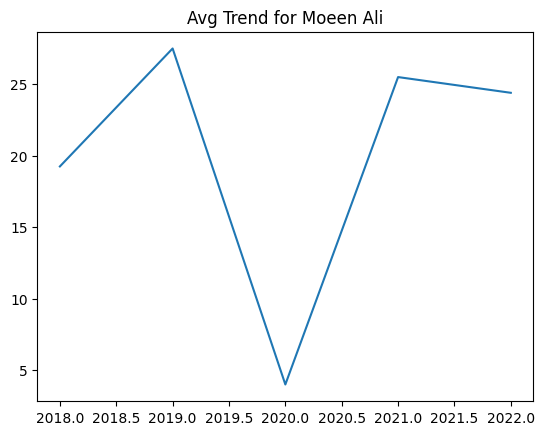

In [18]:
plot_stats(df_pl, 'Avg')

# Bowling Stats

In [19]:
df_ball_raw.columns

Index(['POS', 'Player', 'Mat', 'Inns', 'Ov', 'Runs', 'Wkts', 'BBI', 'Avg',
       'Econ', 'SR', '4w', '5w', 'year'],
      dtype='object')

In [20]:
df_ball_raw.head()

,POS,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w,year
0,1,Yuzvendra Chahal,17,17,68.0,527,27,40/5,19.51,7.75,15.11,1,1,2022
1,2,Wanindu Hasaranga,16,16,57.0,430,26,18/5,16.53,7.54,13.15,1,1,2022
2,3,Kagiso Rabada,13,13,48.0,406,23,33/4,17.65,8.45,12.52,2,0,2022
3,4,Umran Malik,14,14,49.1,444,22,25/5,20.18,9.03,13.40,1,1,2022
4,5,Kuldeep Yadav,14,14,49.4,419,21,14/4,19.95,8.43,14.19,2,0,2022


In [21]:
df_ball_raw.groupby('year').nunique()

,POS,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
year,,,,,,,,,,,,,
2016,86,86,17,17,40,80,20,57,80,74,68,2,2
2017,90,90,17,16,43,79,22,63,84,83,72,2,2
2018,82,82,16,17,48,77,21,59,79,73,67,3,2
2019,87,87,17,17,46,80,23,67,81,76,71,3,2
2020,78,78,17,16,44,74,22,55,73,71,60,3,2
2021,89,89,17,17,44,78,20,69,84,79,66,3,2
2022,103,103,17,17,71,93,25,78,95,95,77,3,2


In [31]:
pl = pick_one(df_ball_raw, 'Player')
# pl = "MS Dhoni"

pl

'Ravindra Jadeja'

In [32]:
filt_pl = (df_ball_raw['Player']==pl)
df_pl = df_ball_raw.loc[filt_pl,:]
df_pl.shape

(7, 14)

In [33]:
df_pl.sort_values(['year'])

,POS,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w,year
32,33,Ravindra Jadeja,15,14,40.0,311,8,5/16,38.87,7.74,30.12,0,0,2016
49,50,Ravindra Jadeja,12,12,38.0,349,5,5/16,69.80,9.18,45.60,0,0,2017
26,27,Ravindra Jadeja,16,14,41.0,303,11,5/16,27.54,7.39,22.36,0,0,2018
12,13,Ravindra Jadeja,16,16,54.0,343,15,5/16,22.86,6.35,21.60,0,0,2019
39,40,Ravindra Jadeja,14,13,36.0,318,6,5/16,53.00,8.75,36.33,0,0,2020
18,19,Ravindra Jadeja,16,16,49.0,346,13,5/16,26.61,7.06,22.61,0,0,2021
60,61,Ravindra Jadeja,10,10,33.0,248,5,39/3,49.60,7.51,39.60,0,0,2022


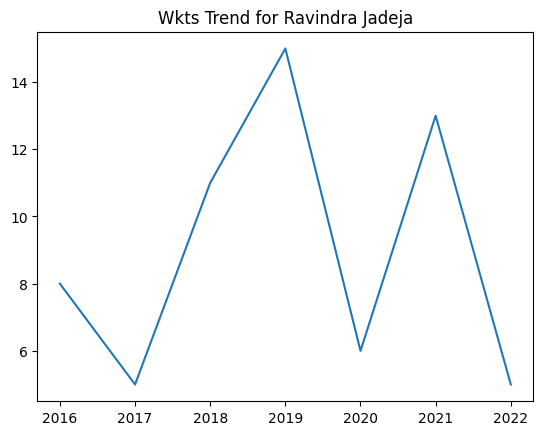

In [35]:
plot_stats(df_pl, 'Wkts')